# **Week 2. Supervised Learning**

2주차 과제는 지도학습의 회귀, 분류 모델을 학습-평가하는 과정을 간소하게 재현한 코드입니다.

1. 적힌 코드를 따라가며, 배운 내용과 어떻게 연관되는지 등을 생각하거나 찾아본 후, 주석으로 달아주시면 좋을 것 같습니다.
2. 더불어 생각해볼 만한 질문들을 중간에 달아두었으니, 이에 대한 고민과 답변을 작성해주시면 됩니다.

# **1. 회귀 - with diabetes dataset**

In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

## 1. 데이터 로드 및 탐색

In [3]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

In [4]:
# 데이터 크기와 피처(특성) 정보 출력
print(f"Dataset Shape: {X.shape}")  # ( , )
print(f"Feature Names: {diabetes.feature_names}")
print(f"Target (y) Sample: {y[:5]}")  # 타겟 값 일부 확인

Dataset Shape: (442, 10)
Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target (y) Sample: [151.  75. 141. 206. 135.]


In [5]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


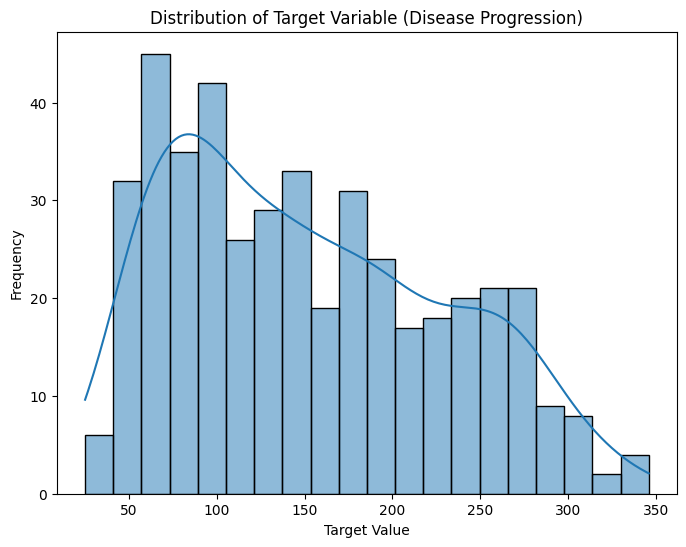

In [8]:
# 히스토그램으로 타겟 값 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], bins=20, kde=True)
plt.title("Distribution of Target Variable (Disease Progression)")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()

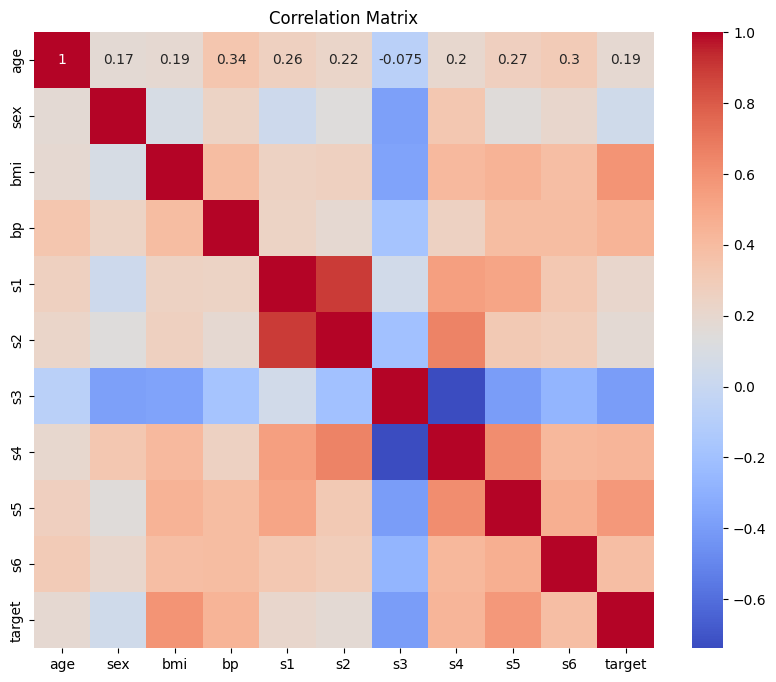

In [9]:
# 상관 행렬 및 히트맵 시각화
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
# Q1-1: 어떤 피처(특성)가 가장 중요한지, 직접 데이터를 분석해보세요.
# Q1-2: 어떤 피처가 'target'과 가장 높은 상관관계를 가지나요?

## 2. 데이터 전처리: 데이터 분할 및 스케일링


In [11]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Q2: 데이터 분할 비율을 70:30 또는 90:10으로 변경하면 결과는 어떻게 달라질까요?

In [13]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Q3: 스케일링을 하지 않고 학습하면 어떤 결과가 나올까요? 한 번 실험해 보세요.

## 3. 모델 적합 (선형 회귀)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)  # 학습 진행

# 모델의 가중치 출력
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]
Model Intercept: 153.73654390934846


In [16]:
# Q4: 모델의 계수를 분석해보세요. 어떤 피처가 타겟에 가장 큰 영향을 미치는지 확인하세요.

In [17]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation

In [18]:
# 모델 평가

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2900.19
R² Score: 0.45


In [19]:
# (선택) Q5: MSE가 높거나 R² 점수가 낮다면, 데이터를 더 분석하거나 다른 모델을 시도해보세요.
# (선택) Q6: 선형 회귀 외에 Decision Tree, Random Forest를 사용해 결과를 비교해보세요.

# 2. **분류 - with Iris dataset**

In [20]:
# 필요한 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1. 데이터 로드 및 탐색

In [21]:
iris = load_iris()
X, y = iris.data, iris.target

feature_names = iris.feature_names
class_names = iris.target_names

In [22]:
# 데이터 크기와 피처 정보 출력
print(f"Dataset Shape: {X.shape}")  # (샘플 수, 피쳐 수) 
print(f"Feature Names: {iris.feature_names}")
print(f"Classes: {iris.target_names}")  # 클래스가 몇 개이고, 어떤 게 있는지 확인해 보세요
print(f"First 5 Samples:\n{X[:5]}")

Dataset Shape: (150, 4)
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
First 5 Samples:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [23]:
# Q1: 각 클래스에 몇 개의 데이터가 있는지 확인해 보세요. 클래스 별 데이터가 균등하게 분포되어 있나요?
unique, counts = np.unique(y, return_counts=True)
class_distribution = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Class Distribution: {class_distribution}")

Class Distribution: {0: 50, 1: 50, 2: 50}


In [24]:
# 데이터프레임으로 변환하여 탐색
df = pd.DataFrame(X, columns=feature_names)
df['class'] = y

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [26]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


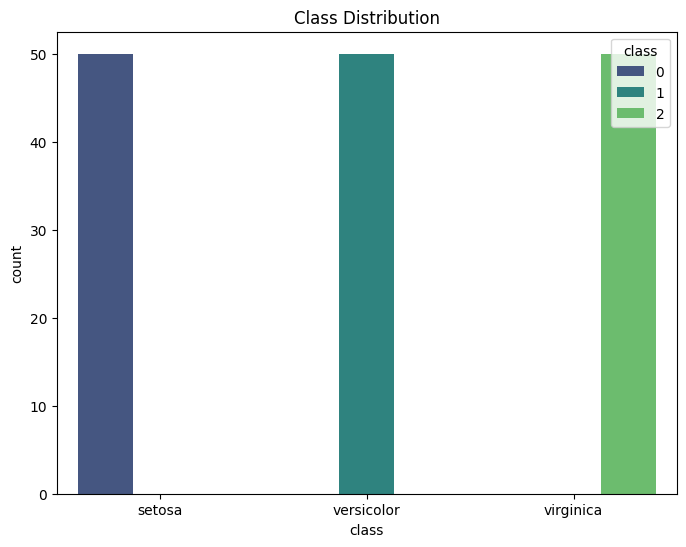

In [27]:
# 클래스별 데이터 분포 확인
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette='viridis', hue='class')
plt.title("Class Distribution")
plt.xticks(ticks=[0, 1, 2], labels=class_names)
plt.show()

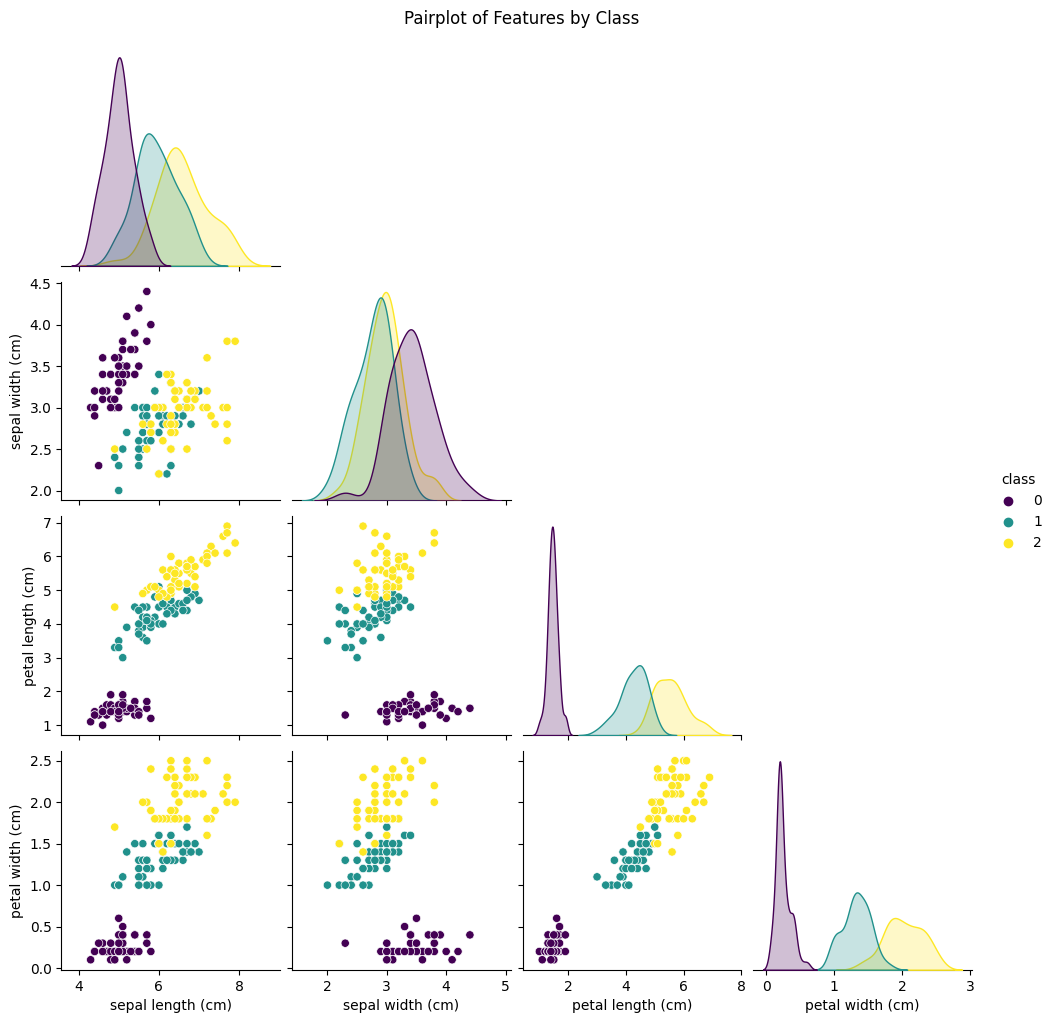

In [28]:
# 피처 간 산점도 행렬
sns.pairplot(df, hue='class', palette='viridis', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()

## 2. 데이터 전처리: 데이터 분할 및 스케일링

In [29]:
# 훈련 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Q2: stratify를 제외하면 클래스 비율이 어떻게 달라질까요? 확인해 보세요.

In [31]:
# 스케일링(표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# Q3: 스케일링을 하지 않고 학습하면 정확도에 어떤 영향을 미칠까요?

## 3. 모델 적합 (SVM)

In [33]:
model = SVC(kernel='linear', C=0.1)  # 선형 커널 사용
model.fit(X_train, y_train)  # 모델 학습

SVC(C=0.1, kernel='linear')

In [34]:
# Q4: C 값을 조정해보세요 (예: 0.1, 10). 모델의 성능에 어떤 영향을 미칠까요?

In [35]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)

## 4. 모델 평가 Evaluation 

In [36]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



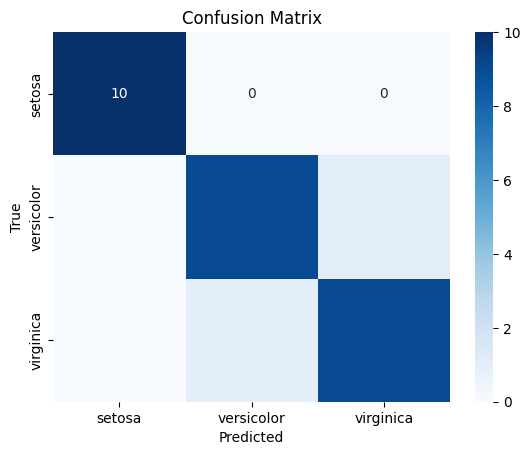

In [37]:
# Confusion Matrix 시각화
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Q6: Confusion Matrix를 보고 결과를 해석해보세요.